# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Rafi Iyad Madani Chaidir]
- **Email:** [rafiiyad2004@gmail.com]
- **ID Dicoding:** [rafi_iyad]

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan dalam rata-rata peminjaman sepeda pada hari libur dibandingkan dengan hari biasa?
- Apakah terdapat perbedaan dalam pola peminjaman sepeda antara musim-musim tertentu?
-  Bagaimana cuaca memengaruhi jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada Tahap ini, saya akan memasukkan data yang telah saya pilih dari 3 dataset yaitu Bike Sharing Dataset.

In [220]:
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")

Di Bike Sharing Dataset terdapat dua file yaitu day.csv dan hour.csv

### Assessing Data

Pada Tahap ini, saya akan mulai memahami dan mempelajari dataset yang telah saya masukkan yaitu day.csv dan hour.csv

Dalam hal ini, saya akan menggunakan `head()` untuk melihat 5 data teratas dan `info()` untuk melihat tipe data datasetnya.

In [221]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [222]:
print(hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Tak lupa juga untuk mengecek Missing Value menggunakan `isna().sum()` dan mengecek data duplikat menggunakan `duplicated().sum()`

In [223]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [224]:
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


Kemudian saya akan gunakan `describe()` untuk mengecek apakah ada keanehan/outliers di dataset.

In [225]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [226]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [227]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [228]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [229]:
day.duplicated().sum()

0

In [230]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah dipahami menggunakan `descibe()`. Data Day dan Hour tidak memiliki Keanehan dan Normal

### Cleaning Data

Pada tahap ini saya akan melalukan cleaning data dimana saya akan memodifikasi dataset agar isinya itu relevan dengan pertanyaan bisnis

Oleh karena itu, Saya membuat dataframe baru yang menghapus fitur instant, windspeed, temp, atemp, hum dan casual karena fitur tersebut saya tidak gunakan

In [231]:
cleaned_day = day.drop(labels=['instant', 'windspeed','temp','atemp','hum','casual'], axis=1)

In [232]:
cleaned_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,654,985
1,2011-01-02,1,0,1,0,0,0,2,670,801
2,2011-01-03,1,0,1,0,1,1,1,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,1518,1600


Agar mudah dipahami, saya akan mengubah isi datanya menjadi kategorial

In [233]:
cleaned_day['yr'] = cleaned_day['yr'].replace({0: 2011, 1: 2012})

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
cleaned_day['season'] = cleaned_day['season'].replace(season_mapping)

weather_mapping = {
    1: 'Clear/Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Light Rain/Cloudy',
    4: 'Extreme Weather'
}
cleaned_day['weathersit'] = cleaned_day['weathersit'].replace(weather_mapping)

month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
cleaned_day['mnth'] = cleaned_day['mnth'].replace(month_mapping)

weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
cleaned_day['weekday'] = cleaned_day['weekday'].replace(weekday_mapping)

In [234]:
cleaned_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,registered,cnt
0,2011-01-01,Spring,2011,January,0,Saturday,0,Mist/Cloudy,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,Mist/Cloudy,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Cloudy,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Cloudy,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Cloudy,1518,1600


## Exploratory Data Analysis (EDA)

### Explore cleaned_day

1. Saya akan melihat berapa saja hari libur dimana ini termasuk hari weekend 

In [235]:
holiday = cleaned_day[(cleaned_day['workingday'] == 0) | (cleaned_day['holiday'] == 1)]['cnt']
holiday.describe()

count     231.000000
mean     4330.168831
std      2052.141245
min       605.000000
25%      2710.500000
50%      4459.000000
75%      5907.500000
max      8714.000000
Name: cnt, dtype: float64

2. Saya akan melihat berapa saja hari kerja/biasa 

In [236]:
workingday = cleaned_day[(cleaned_day['workingday'] == 1)]['cnt']
workingday.describe()

count     500.000000
mean     4584.820000
std      1878.415583
min        22.000000
25%      3344.250000
50%      4582.000000
75%      5987.500000
max      8362.000000
Name: cnt, dtype: float64

3. Saya akan mengelompokkan berdasarkan Musim

In [237]:
cleaned_day.groupby('season')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,188.0,5644.303191,1459.800381,1115.0,4586.5,5353.5,6929.25,8714.0
Spring,181.0,2604.132597,1399.942119,431.0,1538.0,2209.0,3456.00,7836.0
Summer,184.0,4992.331522,1695.977235,795.0,4003.0,4941.5,6377.00,8362.0
Winter,178.0,4728.162921,1699.615261,22.0,3615.5,4634.5,5624.50,8555.0


4. Saya akan mengelompokkan berdasarkan situasi Musimnya

In [238]:
cleaned_day.groupby('weathersit')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
Clear/Cloudy,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
Light Snow/Light Rain/Cloudy,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0
Mist/Cloudy,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada perbedaan dalam rata-rata peminjaman sepeda pada hari libur dibandingkan dengan hari biasa?

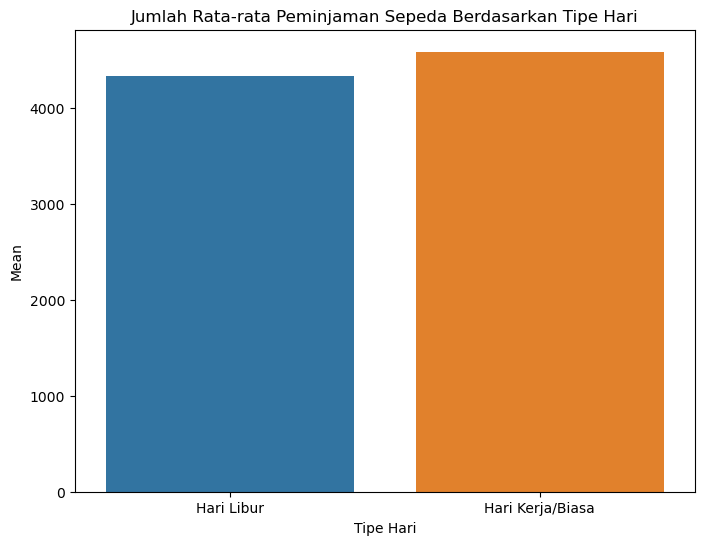

In [239]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Hari Libur', 'Hari Kerja/Biasa'], y=[holiday.mean(), workingday.mean()])
plt.xlabel('Tipe Hari')
plt.ylabel('Mean')
plt.title('Jumlah Rata-rata Peminjaman Sepeda Berdasarkan Tipe Hari')
plt.show()

Berdasarkan Hasil visualisasi diatas kita dapat menarik kesimpulan bahwa 

- Hari kerja/biasa memiliki rata-rata penyewa sepeda terbanyak dibandingkan dengan hari libur
- Perbandingan rata-rata antar tipe hari tidak signifikan berbeda

### Pertanyaan 2 : Apakah terdapat perbedaan dalam pola peminjaman sepeda antara musim-musim tertentu?

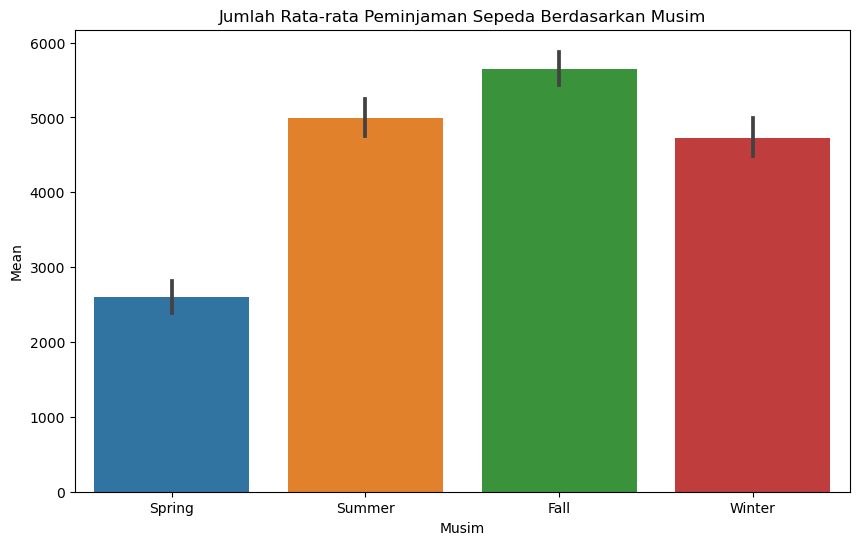

In [240]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=cleaned_day, estimator='mean')
plt.title('Jumlah Rata-rata Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Mean')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

Berdasarkan analisis yang dilakukan menunjukkan bahwa Musim Gugur memiliki rata rata peminjaman sepeda yang tertinggi diikuti oleh Musim Panas, Musim Winter dan Musim Semi. Hal ini menunjukkan bahwa benar musim sangatlah mempengaruhi jumlah peminjam sepeda

## Pertanyaan 3 : Bagaimana cuaca memengaruhi jumlah peminjaman sepeda?

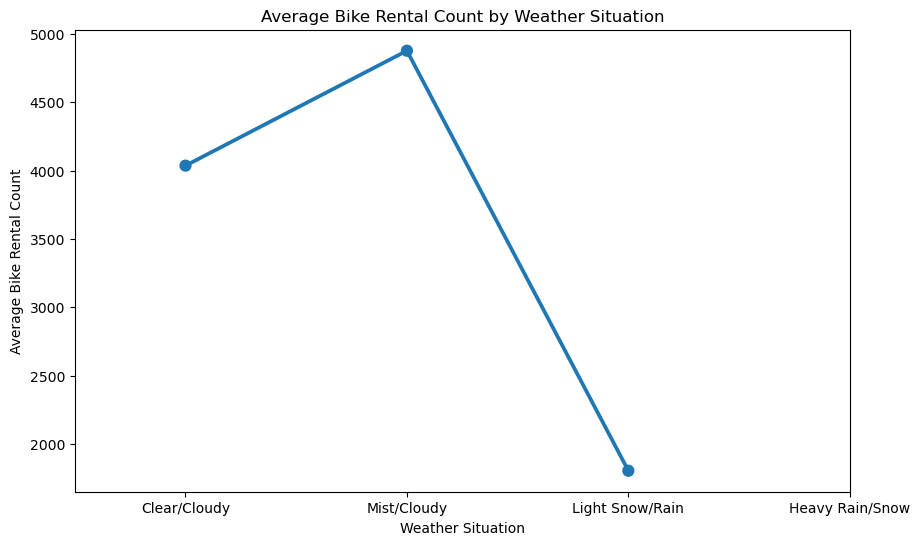

In [241]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='weathersit', y='cnt', data=cleaned_day, errorbar=None)
plt.xlabel('Weather Situation')
plt.ylabel('Average Bike Rental Count')
plt.title('Average Bike Rental Count by Weather Situation')
plt.xticks([0, 1, 2, 3], ['Clear/Cloudy', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

Berdasarkan visualisasi diatas menunjukkan bahwa :  
- Dalam Cuaca berkabut/berawan memiliki jumlah peminjaman sepeda terbanyak.
- Sedangkan dalam cuaca Hujan memiliki jumlah peminjaman sepeda tersedikit.
- Dan di cuara Ekstrim tidak terjadi sama sekali aktivitas peminjaman sepeda.
- Dapat mengambil kesimpulan bahwa kondisi cuaca sangatlah mempengaruhi total peminjaman sepeda

## Conclusion

- Conclution pertanyaan 1

Dari hasil analisis, terlihat bahwa rata-rata peminjaman sepeda pada hari biasa (non-holiday) lebih tinggi dibandingkan dengan hari libur (holiday). Hal ini menunjukkan bahwa mayoritas peminjaman sepeda terjadi pada hari-hari biasa, yang mungkin disebabkan oleh aktivitas sehari-hari seperti pergi ke tempat kerja atau sekolah. Oleh karena itu, dapat disimpulkan bahwa hari biasa cenderung menjadi periode di mana peminjaman sepeda paling banyak terjadi

- Conclution pertanyaan 2

Hasil Analisis mengatakan bahwa musim memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Musim gugur menunjukkan rata-rata peminjaman sepeda tertinggi, diikuti oleh musim panas, musim dingin, dan musim semi secara berurutan. Hal ini menunjukkan bahwa perubahan musim memengaruhi minat masyarakat dalam menggunakan sepeda, dengan tingkat peminjaman yang lebih tinggi terjadi pada musim yang lebih hangat dan cerah. Dengan demikian, kesimpulan ini memberitahu pentingnya faktor cuaca dan musim dalam memprediksi pola peminjaman sepeda.

- Conclution Pertanyaan 3 

Dengan analisis yang telah dilakukan menunjukkan  bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah total peminjaman sepeda. Kondisi cuaca yang baik, seperti cuaca cerah dan bersih, cenderung meningkatkan jumlah peminjaman sepeda, sedangkan kondisi cuaca buruk, seperti hujan atau salju, cenderung mengurangi jumlah peminjaman sepeda bahkan tidak terjadi sama sekali peminjaman sepeda. Hal ini menunjukkan bahwa keputusan untuk meminjam sepeda dipengaruhi oleh kondisi cuaca saat itu.










